Chaos and Dynamical Systems, Part I
==========================================

Christopher Tripp | April 2018

In his famous 1963 paper, Edward Lorenz studied the following finite system of deterministic ordinary nonlinear equations, which represent the behavior of a fluid being heated from below (albeit in a highly simplified form):

\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\[0.5em]
\frac{dy}{dt} &= rx - y - xz \\[0.5em]
\frac{dz}{dt} &= xy - bz
\end{align}

and discovered that small changes to the initial conditions resulted in large changes to the output.  

Let's use our RK4 code to solve and plot this system.

In [1]:
#python 2
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#take the array of a_i values and return the array of their derivatives, based on the eqns we're trying to solve
def f_lorenz(a, t, sigma, r, b):  
    #initialize derivative array
    da_dt = np.zeros(len(a))
    
    #a_0 = x
    #a_1 = y
    #a_2 = z
    
    #d(a_0)/dt = sigma*(a_1 - a_0)
    da_dt[0] = sigma*(a[1] - a[0])
    
    #d(a_1)/dt = (r*a_0) - a_1 - (a_0*a_2)
    da_dt[1] = (r*a[0]) - a[1] - (a[0]*a[2])
    
    #d(a_2)/dt = (a_0 * a_1) - (b * a_2)
    da_dt[2] = (a[0] * a[1]) - (b * a[2])

    return da_dt

In [3]:
#take an array of our variables a_i at time=t and return array a_i at time=(t+h) using RK4 method
def rungekutta_lorenz(old_vals, t, h, sigma, r, b):
    k1 = h*(f_lorenz(old_vals, t, sigma, r, b))
    k2 = h*(f_lorenz((old_vals + (0.5*k1)), (t + (0.5*h)), sigma, r, b))
    k3 = h*(f_lorenz((old_vals + (0.5*k2)), (t + (0.5*h)), sigma, r, b))
    k4 = h*(f_lorenz((old_vals + k3), (t + h), sigma, r, b))
    return (old_vals + ((1.0/6.0)*(k1 + (2*k2) + (2*k3) + k4)))

In [4]:
def lorenz_system(a0_init, a1_init, a2_init, time_vals):   
    #create and initialize a_i array with initial x, y, and z conditions
    a = np.zeros(order)
    a[0] = a0_init
    a[1] = a1_init
    a[2] = a2_init
    
    #create an array for the values of a_0, a_1, a_2 at each time
    a_0_solutions = np.zeros(len(time_vals))
    a_0_solutions[0] = a0_init #initialize
    a_1_solutions = np.zeros(len(time_vals))
    a_1_solutions[0] = a1_init #initialize
    a_2_solutions = np.zeros(len(time_vals))
    a_2_solutions[0] = a2_init #initialize
    
    #for each time t, use RK4 to find value of a_i at time=(t+h), then save a_0(t+h) into the array of a_0 values
    for t_n in np.arange(1, len(time_vals), 1):
        a = rungekutta_lorenz(a, t_n, h, sigma, r, b)
        a_0_solutions[t_n] = a[0]
        a_1_solutions[t_n] = a[1]
        a_2_solutions[t_n] = a[2]
        
    return (a_0_solutions, a_1_solutions, a_2_solutions)

Let's use $\sigma = 10$, $r = 28$, and $b = 8/3$ for the constants (as per source 2), and examine the plots for two nearly-but-not-quite identical initial conditions, namely $x_1(0)=y_1(0)=1$, $z_1(0)=20.0$ and $x_2(0)=y_2(0)=1$, $z_2(0)=20.1$.  For the plots, let's just look at the $x$-values.

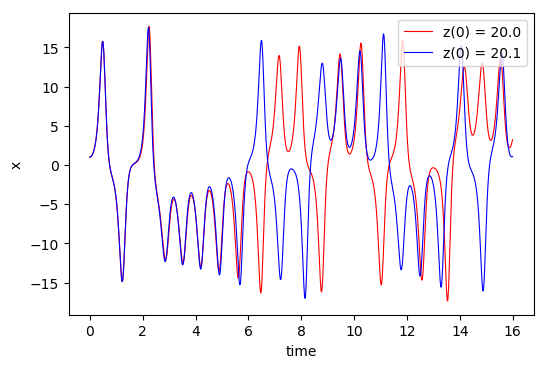

In [5]:
#define the step
h = 0.01

#define the order of the original diff eq to be solved
order = 3

#initial time value
t_init = 0

#lorenz constants
sigma = 10.0
r = 28.0
b = (8.0/3.0)

#define the extent of the time interval we shall plot
t_final = 16

#create and initialize time array
time_vals = np.arange(t_init, t_final, h) 

x1, y1, z1 = lorenz_system(1.0, 1.0, 20.0, time_vals)
x2, y2, z2 = lorenz_system(1.0, 1.0, 20.1, time_vals)

#plot a_0 values against time    
plt.figure(dpi=100)
plt.plot(time_vals, x1, "r-", linewidth=0.8, label="z(0) = 20.0")
plt.plot(time_vals, x2, "b-", linewidth=0.8, label="z(0) = 20.1")
plt.xlabel("time")
plt.ylabel("x")
plt.legend(loc=0)
plt.show()

We see that while the two graphs are in-sync for the first few time units, they slowly begin to diverge before becoming completely different at around $t = 6$.  We can visualize this even more clearly if we plot the difference between the two solution sets:

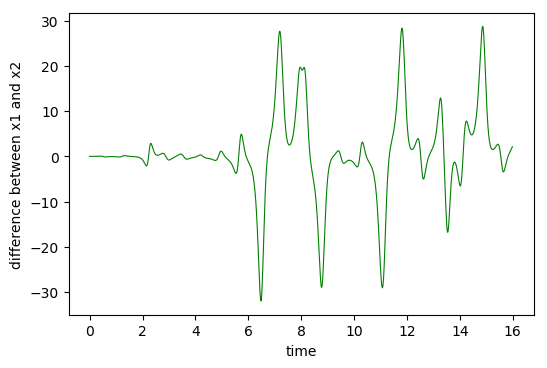

In [25]:
#plot difference (x1 - x2)   
plt.figure(dpi=100)
plt.plot(time_vals, (x1-x2), "g-", linewidth=0.8)
plt.xlabel("time")
plt.ylabel("difference between x1 and x2")
plt.show()

This system is characterized by **deterministic chaos**, where there there is sensitive dependence on initial conditions, and where the present system depends on the one just past in a well-determined way through physical laws.  We can see from our graphs why Lorenz concluded that long-term predictions about the behavior of a chaotic system is nearly impossible.

Now let's analyze the behavior of the Lorenz system by looking at the plot of the solutions in phase space:

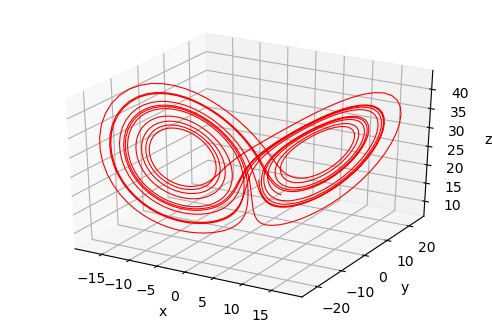

In [26]:
#make 3D plot of lorenz attractor
fig = plt.figure(dpi=100)
ax = plt.axes(projection='3d')
ax.plot3D(x1, y1, z1, 'r-', linewidth=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Even better, let's animate this plot so that we can watch its evolution:

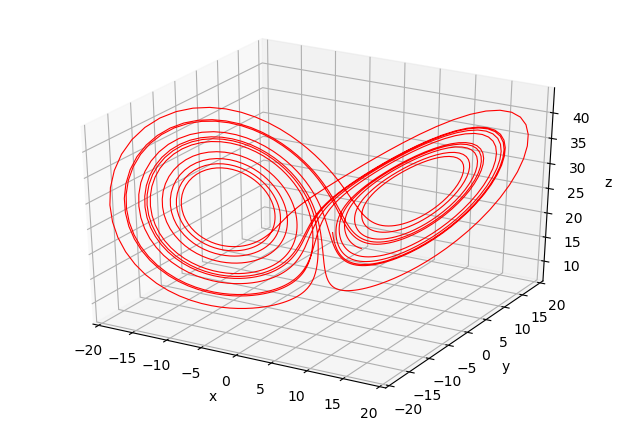

In [24]:
#make *animated* 3D plot of lorenz attractor
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(dpi=100)
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
line, = ax.plot3D(x1, y1, z1, 'r-', linewidth=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def update(num):
    line.set_data(x1[:num], y1[:num])
    line.set_3d_properties(z1[:num])
    line.axes.axis([-20, 20, -20, 20])
    fig.canvas.draw()
    return line,

ani = animation.FuncAnimation(fig, update, init_func=init, frames=len(time_vals), blit=True)

#NOTE: for some reason, the below code is creating and saving the video fine, but not displaying it here in the notebook
ani.save('3d_lorenz.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML("<video controls><source src='3d_lorenz.mp4' type='video/mp4'></video>")

plt.show()

We see that the system never settles in one place, which would indicate stability, nor does it ever loop back exactly on itself, which would indicate periodicity.  It stays within certain bounds, but never repeats itself, indicating the sort of complex disorder that characterizes chaotic systems.  

**Sources:**

Lorenz, "Deterministic Nonperiodic Flow", Journal of the Atmospheric Sciences, Vol. 20, 1963

http://bender.astro.sunysb.edu/classes/phy688_spring2013/lectures/ODEs.pdf

https://stackoverflow.com/questions/28074461/animating-growing-line-plot-in-python-matplotlib#28077104

https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/

Gleick, "Chaos: Making a New Science"

Thornton & Marion, "Classical Dynamics of Particles and Systems", Chapter 4: "Nonlinear Oscillatons and Chaos"